/Users/knaegle/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


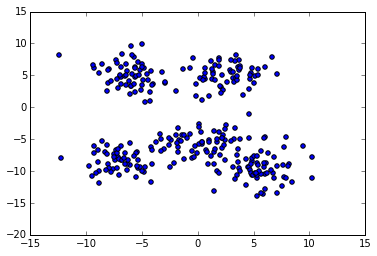

In [1]:
############################################################################
# OpenEnsemble Project													   #
# Demonstration of hierarchical clustering linkage on Guassian Toy from Ronan et al. Sci Sig 2016 #
############################################################################
#comment this to suppress showing in notebooks
%matplotlib inline 


import numpy as np 
import pandas as pd 
from sklearn import datasets
import openensembles as oe
import matplotlib.pyplot as plt
import pylab
import scipy.cluster.hierarchy as sch

#set up dataset
np.random.seed(0)
n_samples = 300
blobs = datasets.make_blobs(n_samples=n_samples, random_state=10,centers=5,cluster_std=2)
X, y = blobs

#check the data by plotting the two dimensions
plt.scatter(X[:,0], X[:,1])


In [2]:
# Setup the open ensembles data object

df = pd.DataFrame(X)
#create an open ensembles data object from the dataframe
dataObj = oe.data(df, [1,2])

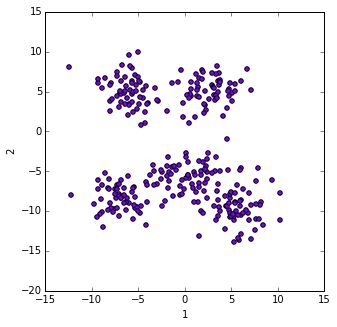

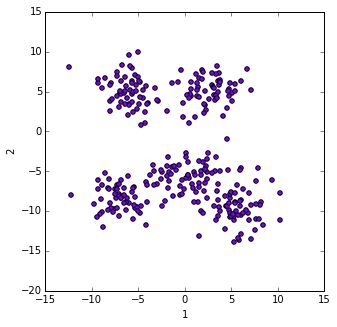

In [3]:
fig=plt.figure(figsize=(5,5))
plot_num=1
dataObj.plot_data('parent', plot_num)

In [4]:
# Now create a complete linkage clustering of the data

#construct the cluster object
c = oe.cluster(dataObj)


In [5]:
#agglomerative clustering with complete linkage

algorithm = 'agglomerative'
k = 5
linkage = 'complete'
name = algorithm+'_'+linkage+'_'+str(k)

#here is where you set variable arguments specific to the algorithm
params = {}
params['linkage'] = linkage
c.cluster('parent', algorithm, name, k, params)

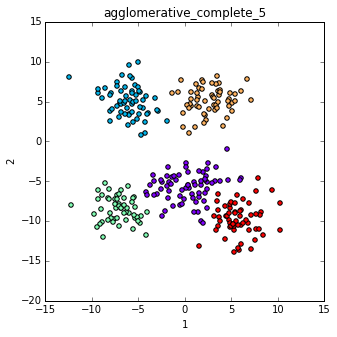

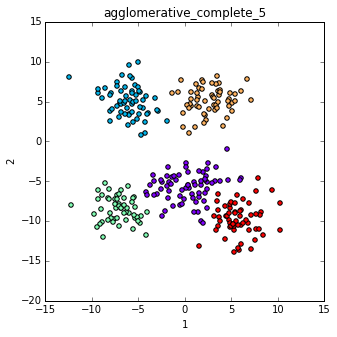

In [6]:
#plot the data, coloring classes according to the solution of the desired name. 
fig=plt.figure(figsize=(5,5))
plot_num+=1
dataObj.plot_data('parent', fignum=plot_num, title=name, class_labels=c.labels[name])

# Directly call sklearn in order to plot heatmap of data and dendrograms 

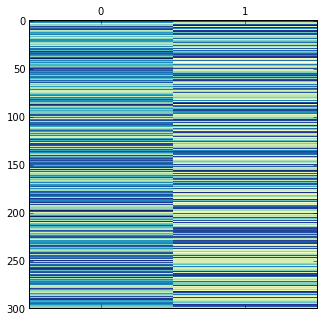

In [10]:
#first, what does the unsorted matrix look like
fig=plt.figure(figsize=(5,5))
axmatrix = fig.add_axes([0.10,0,0.80,0.80])
im = axmatrix.matshow(X, cmap=pylab.cm.YlGnBu, aspect='auto')#, aspect=’auto’, origin=’lower’, cmap=pylab.cm.YlGnBu)


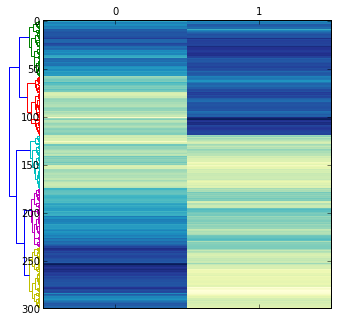

In [8]:
# now calculate the linkages, which gives you an order and a dendrogram
fig=plt.figure(figsize=(5,5))

#dendrogram axes are added and calculated
ax1 = fig.add_axes([0,0,0.09,0.80])
dendrogram_distance=12 #this sets the color threshold and shows you where cuts can be made at what linkage length

#calculate linkage and get a dendrogram object
Y = sch.linkage(X, method=linkage)
Z1 = sch.dendrogram(Y, orientation='right', color_threshold=dendrogram_distance)

ax1 = fig.add_axes([0,0,0.09,0.80])
ax1.set_xticks([])
ax1.set_yticks([])
fig.gca().invert_yaxis() # this plus the y-axis invert in the heatmap flips the y-axis heatmap orientation
ax1.axis('off')


idx1 = Z1['leaves'] #index ordering of the dendrogram
sorted_X = X[idx1,:] 
axmatrix = fig.add_axes([0.10,0,0.80,0.80])
im = axmatrix.matshow(sorted_X, cmap=pylab.cm.YlGnBu, aspect='auto') #now plotting with an ordered sort
